# INSTALL DEPENDENCIES

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import cv2

/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


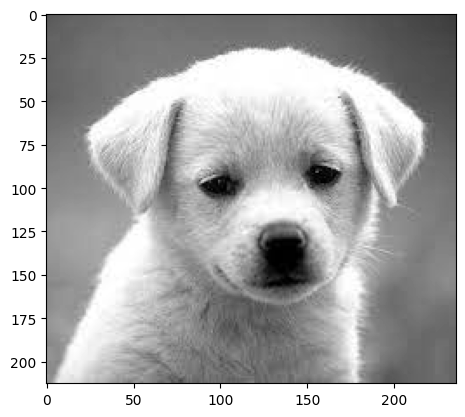

In [2]:
grayImg = cv2.imread(r'../../Downloads/puppy.jpeg', cv2.IMREAD_GRAYSCALE)
j_binary_img = cv2.imread(r'../../Downloads/j.png')
plt.imshow(grayImg, cmap='gray')

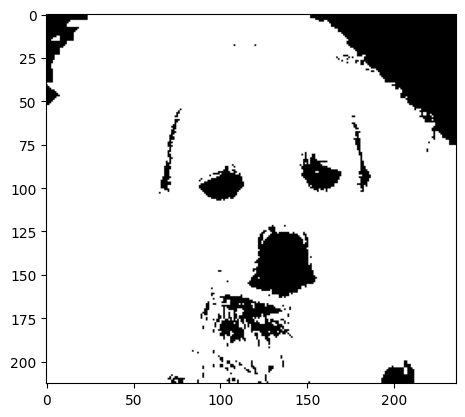

In [3]:
th = 100
binary_img = (grayImg > th) * 255

plt.imshow(binary_img, cmap='gray')

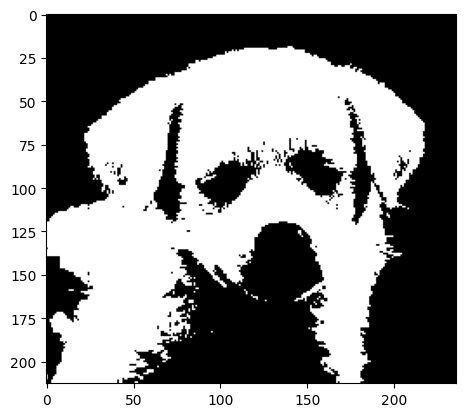

In [4]:
th = 150
binary_img = grayImg > th

plt.imshow(binary_img, cmap='gray')

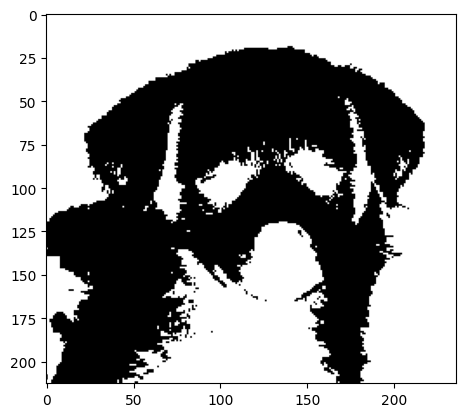

In [5]:
th = 150
binary_img = (grayImg > th) * 255

plt.imshow(~(binary_img), cmap='gray')

In [6]:
K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
K_r

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [7]:
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
K_e

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [8]:
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
K_c

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [9]:
D_r = cv2.dilate(j_binary_img, K_r)
D_e = cv2.dilate(j_binary_img, K_e)
D_c = cv2.dilate(j_binary_img, K_c)

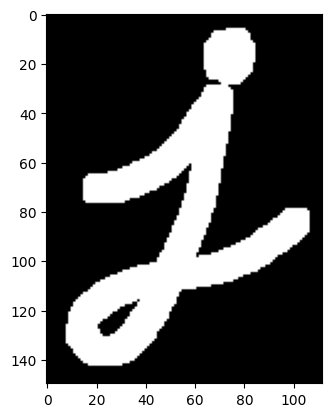

In [10]:
plt.imshow(D_r, cmap='gray')

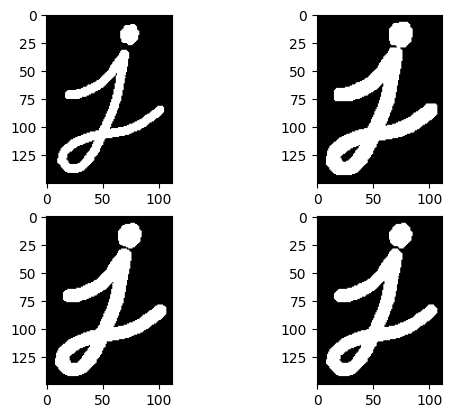

In [11]:
plt.subplot(221)
plt.imshow(j_binary_img, cmap='gray')
plt.subplot(222)
plt.imshow(D_r, cmap='gray')
plt.subplot(223)
plt.imshow(D_e, cmap='gray')
plt.subplot(224)
plt.imshow(D_c, cmap='gray')

In [12]:
print(np.sum((D_r-D_c)**2))

1419


In [13]:
print(np.sum((D_r-D_e)**2))

912


In [14]:
print(np.sum((D_e-D_c)**2))

507


In [53]:
im_bool = np.array(j_binary_img[:,:,0], dtype=np.bool_)

In [54]:
im_bool.dtype

dtype('bool')

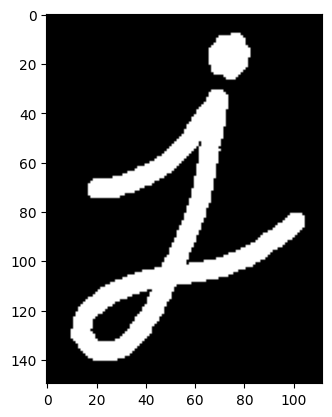

In [55]:
plt.imshow(im_bool, cmap='gray')

In [56]:
N = np.random.rand(im_bool.shape[0], im_bool.shape[1])

In [57]:
N

array([[0.20595912, 0.40413154, 0.12207652, ..., 0.92667778, 0.56726864,
        0.60955157],
       [0.98549575, 0.37931713, 0.80925213, ..., 0.83271244, 0.7752518 ,
        0.6994574 ],
       [0.35164573, 0.6872342 , 0.99959826, ..., 0.6925339 , 0.46458021,
        0.12341673],
       ...,
       [0.94828297, 0.34237485, 0.55495555, ..., 0.64662321, 0.47878458,
        0.9653074 ],
       [0.2237848 , 0.73442312, 0.26410172, ..., 0.05971369, 0.23127411,
        0.82541979],
       [0.62770709, 0.15833002, 0.43075968, ..., 0.3332785 , 0.72075534,
        0.30143689]])

In [58]:
N_img = N>0.98 

In [59]:
N_img

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

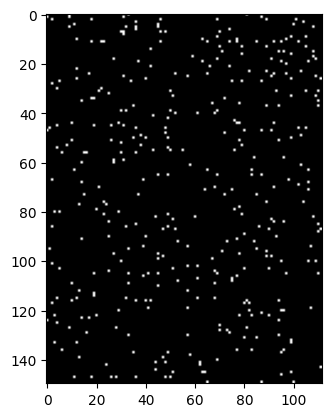

In [60]:
plt.imshow(N_img, cmap='gray')

In [61]:
j_binary_img.dtype

dtype('uint8')

In [62]:
im_bool.dtype

dtype('bool')

In [64]:
N_img_binary =  N_img | im_bool
N_img

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [65]:
N_img_binary =  (N_img | im_bool)*255
N_img

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

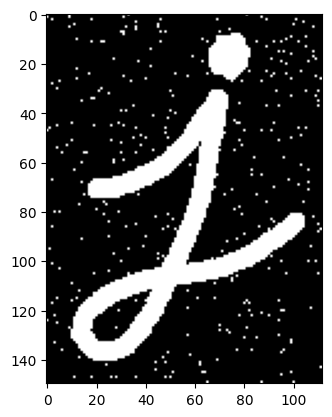

In [66]:
plt.imshow(N_img_binary, cmap='gray')

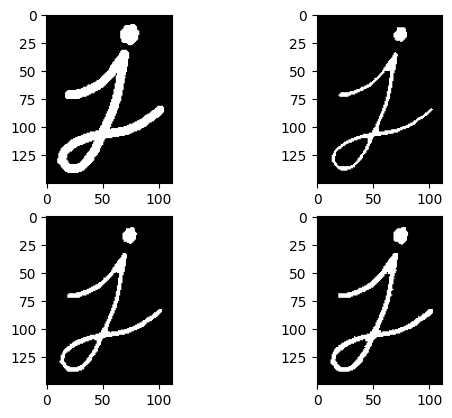

In [67]:
E_r = cv2.erode(np.float32(N_img_binary), K_r)
E_e = cv2.erode(np.float32(N_img_binary), K_e)
E_c = cv2.erode(np.float32(N_img_binary), K_c)

plt.subplot(221)
plt.imshow(j_binary_img, cmap='gray')
plt.subplot(222)
plt.imshow(E_r, cmap='gray')
plt.subplot(223)
plt.imshow(E_e, cmap='gray')
plt.subplot(224)
plt.imshow(E_c, cmap='gray')

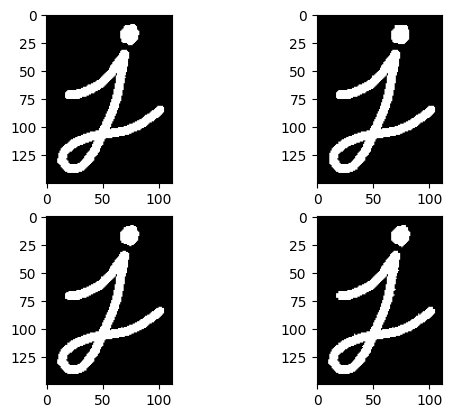

In [68]:
D_r = cv2.dilate(E_r, K_r)
D_e = cv2.dilate(E_e, K_e)
D_c = cv2.dilate(E_c, K_c)

plt.subplot(221)
plt.imshow(j_binary_img, cmap='gray')
plt.subplot(222)
plt.imshow(D_r, cmap='gray')
plt.subplot(223)
plt.imshow(D_e, cmap='gray')
plt.subplot(224)
plt.imshow(D_c, cmap='gray')

In [69]:
O_r = cv2.morphologyEx(np.float32(N_img_binary), cv2.MORPH_OPEN, K_r)

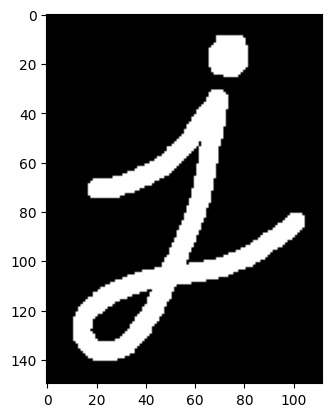

In [70]:
plt.imshow(O_r, cmap='gray')

# CLOSE

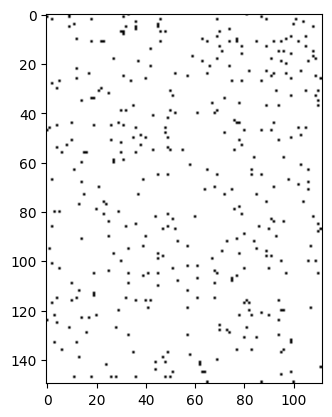

In [71]:
img_N = N<0.98
plt.imshow(img_N, cmap='gray')

In [80]:
N_img_binary_H =  img_N & im_bool

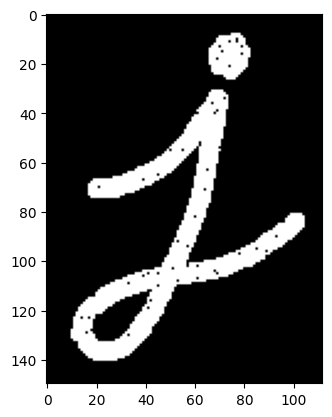

In [81]:
plt.imshow(N_img_binary_H, cmap='gray')

In [83]:
C_r = cv2.morphologyEx(np.float32(N_img_binary_H), cv2.MORPH_CLOSE, K_r)

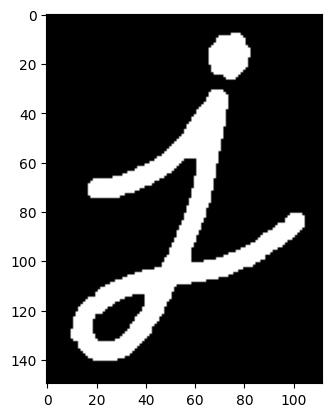

In [84]:
plt.imshow(C_r, cmap='gray')


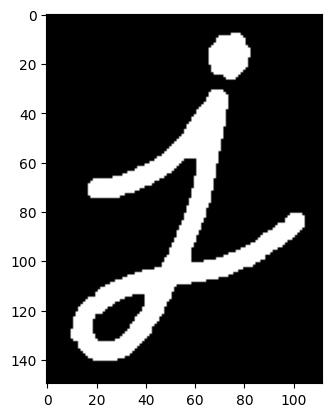

In [87]:
D_r = cv2.dilate(np.float32(N_img_binary_H),K_r)
C_r = cv2.erode(D_r,K_r)
plt.imshow(C_r,cmap='gray')

# GRADIENT_MORPHOLOGY

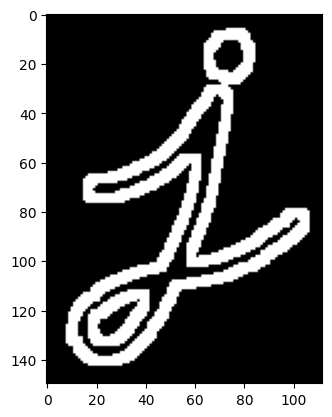

In [89]:
G_r = cv2.morphologyEx(C_r,cv2.MORPH_GRADIENT,K_r)
plt.imshow(G_r,cmap='gray')

# TOP HAT (INPUT-OPENING)

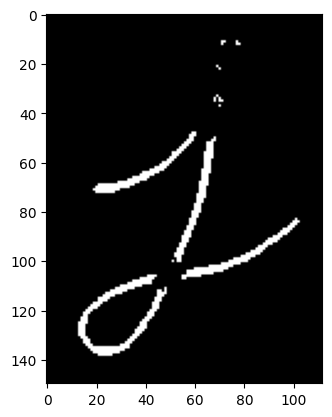

In [92]:
TH_c = cv2.morphologyEx(E_r,cv2.MORPH_TOPHAT,K_c)
plt.imshow(TH_c,cmap='gray')


# BLACK HAT (CLOSING - INPUT)

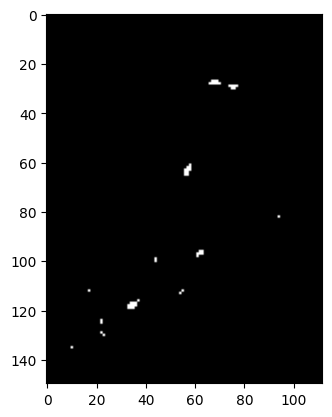

In [99]:
BH_c = cv2.morphologyEx(D_r,cv2.MORPH_BLACKHAT,K_c)
plt.imshow(BH_c,cmap='gray')
